In [1]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [2]:
df = aux.load_data(Path("../results_synced/ratio/"))
df

,dataset,arch,repr,pretrain,fold_number,random_state,batch_size,stride_series,window_length,window_time_stride,...,target_test_acc,target_val_f1,target_test_f1,target_val_auroc,target_test_auroc,pre_val_mse,pre_val_r2,pre_best_model,pre_train_csv,pre_nepochs
0,GunPoint,CNN,DF,False,2,0,128,False,5,1,...,0.495794,0.668577,0.495794,0.680819,0.491237,NaN,NaN,NaN,NaN,NaN
1,GunPoint,CNN,DF,True,2,0,128,False,5,1,...,0.511994,0.663366,0.511994,0.683489,0.457300,0.812175,0.367504,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,59.0
2,GunPoint,CNN,DF,True,2,0,128,False,5,1,...,0.486834,0.633924,0.486834,0.681876,0.496133,1.153903,-0.320485,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,59.0
3,GunPoint,CNN,DF,True,2,0,128,False,5,1,...,0.496471,0.684732,0.496471,0.759735,0.508910,0.605643,0.611806,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,46.0
4,GunPoint,CNN,DF,False,2,0,128,False,5,1,...,0.507592,0.578406,0.507592,0.616573,0.525115,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Chinatown,CNN,DF,True,4,0,128,False,5,1,...,0.599772,0.711609,0.599772,0.777756,0.556404,0.555609,0.537277,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,58.0
249,Chinatown,CNN,DF,True,4,0,128,False,5,1,...,0.626324,0.722200,0.626324,0.776181,0.566689,0.514047,0.698031,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,59.0
250,OSULeaf,CNN,DF,False,1,0,128,True,5,1,...,0.210719,0.271729,0.210719,0.532283,0.525969,NaN,NaN,NaN,NaN,NaN
251,OSULeaf,CNN,DF,True,1,0,128,True,5,1,...,0.254386,0.245929,0.254386,0.558490,0.534917,0.879964,0.211918,training/2023-03-29_22-54_EXP_ratio_DF_CNN_OSU...,training/2023-03-29_22-54_EXP_ratio_DF_CNN_OSU...,50.0


In [3]:
cols = ['tgt_nepochs', 'pre_nepochs', 'target_val_acc', 'target_val_auroc', 'target_test_acc', 'target_test_auroc']
df.columns

Index(['dataset', 'arch', 'repr', 'pretrain', 'fold_number', 'random_state',
       'batch_size', 'stride_series', 'window_length', 'window_time_stride',
       'window_patt_stride', 'train_events_per_class',
       'train_event_multiplier', 'nevents_train', 'pret_event_multiplier',
       'nevents_pret', 'test_event_multiplier', 'nevents_test',
       'tgt_best_model', 'tgt_train_csv', 'tgt_nepochs', 'target_val_acc',
       'target_test_acc', 'target_val_f1', 'target_test_f1',
       'target_val_auroc', 'target_test_auroc', 'pre_val_mse', 'pre_val_r2',
       'pre_best_model', 'pre_train_csv', 'pre_nepochs'],
      dtype='object')

In [4]:
df.groupby(["dataset", "arch", 'train_events_per_class', 'pret_event_multiplier'])[cols].mean()

tgt_nepochs  \
dataset   arch train_events_per_class pret_event_multiplier                
ArrowHead CNN  8                      0                            43.20   
                                      4                            46.00   
                                      8                            26.00   
                                      16                           57.20   
               16                     0                            78.20   
                                      4                            55.60   
                                      8                            69.00   
                                      16                           81.00   
               32                     0                            90.80   
                                      4                            65.80   
                                      8                            54.40   
                                      16                          104.20   
CBF       CNN  8                      0                            30.40   
                                      4                            51.60   
                                      8                            45.20   
                                      16                           47.40   
               16                     0                            30.40   
                                      4                            31.80   
                                      8                            35.40   
                                      16                           53.60   
               32                     0                            67.00   
                                      4                            29.40   
                                      8                            11.00   
                                      16                           31.60   
Chinatown CNN  8                      0                            79.00   
                                      4                            77.60   
                                      8                            82.00   
                                      16                           87.00   
               16                     0                            56.40   
                                      4                            57.40   
                                      8                            72.00   
                                      16                           61.00   
               32                     0                            69.00   
                                      4                            85.60   
                                      8                            79.00   
                                      16                           93.60   
GunPoint  CNN  8                      0                            31.80   
                                      4                            84.60   
                                      8                            56.40   
                                      16                           82.40   
               16                     0                            66.40   
                                      4                            78.80   
                                      8                            72.80   
                                      16                           80.60   
               32                     0                            86.60   
                                      4                            78.20   
                                      8                           113.40   
                                      16                           72.00   
OSULeaf   CNN  8                      0                            54.60   
                                      4                            80.75   
                                      8                            71.75   

                                

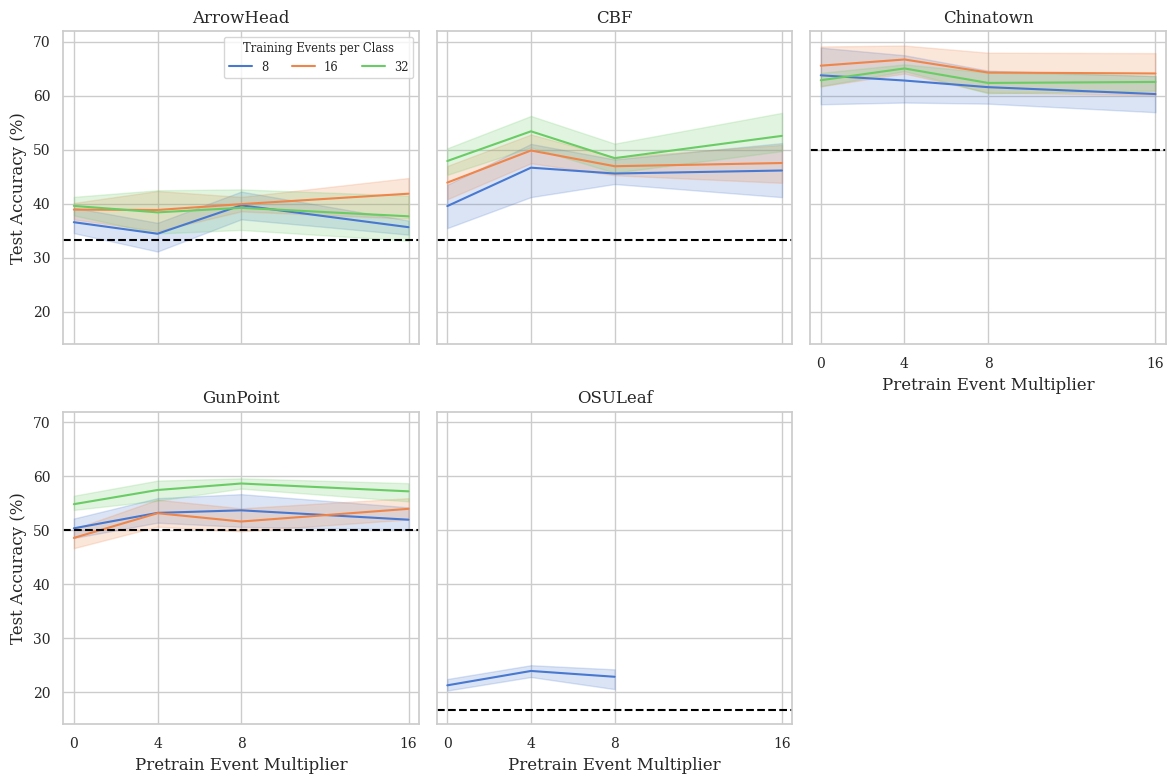

In [5]:
data = df.copy()
data['target_test_acc'] = 100*data["target_test_acc"]
#data['pret_event_multiplier'] = data['pret_event_multiplier'].astype("category")
#data["xd"] = data["pretrained"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
#data["hue"] = data["arch"] + " " + data["xd"]
data.sort_values(["dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
# g = sns.catplot(data=data, x='train_events_per_class', y="target_test_acc", hue='pret_event_multiplier', col="dataset", #row="arch",# hue="pretrained",
#                 kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
#                 errorbar="sd", col_wrap=3, sharex=False, sharey=True, facet_kws={"despine": False, "ylim": (15, 75),
#                 "gridspec_kws": {}});
g = sns.relplot(data=data, x='pret_event_multiplier', y="target_test_acc", hue='train_events_per_class', col="dataset", kind="line", 
                height=4, aspect=1, legend=True, palette="muted", col_wrap=3, markers="True", facet_kws={"despine": False})


g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("")
g.legend.remove()

# Set the x-axis tick labels to be the same for all plots
for ax in g.axes.flat:
    ax.set_xticks([0, 4, 8, 16])
    ax.set_xlim(-0.5, 16.5)

#g.add_legend(adjust_subtitles=True, fontsize="x-small");
for i, nc in enumerate([3, 3, 2, 2, 6]):
    g.facet_axis(0,i).axhline(100/nc, ls="--", color="black");
g.facet_axis(0,0).legend(fontsize="x-small", title="Training Events per Class", title_fontsize="x-small", ncol=3);
plt.savefig("ratio_CNN.pdf")
g.set_xlabels('Pretrain Event Multiplier');

In [6]:
df = aux.load_data(Path("../results_synced/bline/"))
df

,dataset,arch,repr,pretrain,fold_number,random_state,batch_size,stride_series,window_length,window_time_stride,...,nevents_test,tgt_best_model,tgt_train_csv,tgt_nepochs,target_val_acc,target_test_acc,target_val_f1,target_test_f1,target_val_auroc,target_test_auroc
0,ArrowHead,RNN,TS,False,0,0,128,True,5,1,...,384,training/2023-03-31_09-36_EXP_wdw_TS_RNN_Arrow...,training/2023-03-31_09-36_EXP_wdw_TS_RNN_Arrow...,108,0.343545,0.352435,0.343545,0.352435,0.505604,0.509691
1,Chinatown,ResNet,TS,False,0,0,128,True,5,1,...,256,training/2023-03-31_17-05_EXP_wdw_TS_ResNet_Ch...,training/2023-03-31_17-05_EXP_wdw_TS_ResNet_Ch...,87,0.594297,0.563539,0.594297,0.563539,0.620602,0.649261
2,GunPoint,ResNet,TS,False,0,0,128,True,5,1,...,256,training/2023-03-31_16-13_EXP_wdw_TS_ResNet_Gu...,training/2023-03-31_16-13_EXP_wdw_TS_ResNet_Gu...,2,0.527317,0.543757,0.527317,0.543757,0.566879,0.578292
3,GunPoint,ResNet,TS,False,3,0,128,True,5,1,...,256,training/2023-03-31_16-22_EXP_wdw_TS_ResNet_Gu...,training/2023-03-31_16-22_EXP_wdw_TS_ResNet_Gu...,12,0.608127,0.551883,0.608127,0.551883,0.587568,0.588689
4,GunPoint,CNN,TS,False,1,0,128,True,5,1,...,256,training/2023-03-31_15-13_EXP_wdw_TS_CNN_GunPo...,training/2023-03-31_15-13_EXP_wdw_TS_CNN_GunPo...,16,0.567884,0.552248,0.567884,0.552248,0.569978,0.582447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,ArrowHead,RNN,TS,False,2,0,128,True,5,1,...,384,training/2023-03-31_12-11_EXP_wdw_TS_RNN_Arrow...,training/2023-03-31_12-11_EXP_wdw_TS_RNN_Arrow...,10,0.338850,0.319523,0.338850,0.319523,0.499674,0.503843
68,GunPoint,RNN,TS,False,2,0,128,True,5,1,...,256,training/2023-03-31_06-36_EXP_wdw_TS_RNN_GunPo...,training/2023-03-31_06-36_EXP_wdw_TS_RNN_GunPo...,85,0.546070,0.531984,0.546070,0.531984,0.492262,0.533627
69,OSULeaf,RNN,TS,False,2,0,128,True,5,1,...,640,training/2023-03-31_15-07_EXP_wdw_TS_RNN_OSULe...,training/2023-03-31_15-07_EXP_wdw_TS_RNN_OSULe...,42,0.207650,0.205669,0.207650,0.205669,0.481282,0.506751
70,OSULeaf,CNN,TS,False,2,0,128,True,5,1,...,640,training/2023-03-31_16-01_EXP_wdw_TS_CNN_OSULe...,training/2023-03-31_16-01_EXP_wdw_TS_CNN_OSULe...,14,0.266373,0.261295,0.266373,0.261295,0.576603,0.592616


In [7]:
cols = ['tgt_nepochs', 'target_val_acc', 'target_val_auroc', 'target_test_acc', 'target_test_auroc']
df.groupby(["dataset", "repr", "arch"])[cols].mean()

tgt_nepochs  target_val_acc  target_val_auroc  \
dataset   repr arch                                                    
ArrowHead TS   CNN            34.8        0.346082          0.506147   
               RNN            29.6        0.342959          0.504595   
               ResNet         53.6        0.348380          0.509668   
CBF       TS   CNN            11.2        0.364564          0.529277   
               RNN            29.4        0.358134          0.504426   
               ResNet         64.8        0.358551          0.508722   
Chinatown TS   CNN            46.6        0.634216          0.659751   
               RNN            83.8        0.628269          0.646218   
               ResNet         69.6        0.648554          0.689247   
GunPoint  TS   CNN            46.8        0.586625          0.588511   
               RNN            56.6        0.578694          0.572855   
               ResNet         30.2        0.588396          0.595046   
OSULeaf   TS   CNN            42.2        0.243372          0.534884   
               RNN            69.6        0.238350          0.530903   
               ResNet          6.0        0.247930          0.555176   

                       target_test_acc  target_test_auroc  
dataset   repr arch                                        
ArrowHead TS   CNN            0.293274           0.513274  
               RNN            0.322675           0.502110  
               ResNet         0.308218           0.503545  
CBF       TS   CNN            0.360668           0.524400  
               RNN            0.339071           0.494298  
               ResNet         0.355809           0.512623  
Chinatown TS   CNN            0.495145           0.609993  
               RNN            0.550244           0.607753  
               ResNet         0.519746           0.625445  
GunPoint  TS   CNN            0.554441           0.573557  
               RNN            0.538506           0.548347  
               ResNet         0.559181           0.571142  
OSULeaf   TS   CNN            0.238954           0.535200  
               RNN            0.235919           0.543430  
               ResNet         0.230873           0.555169

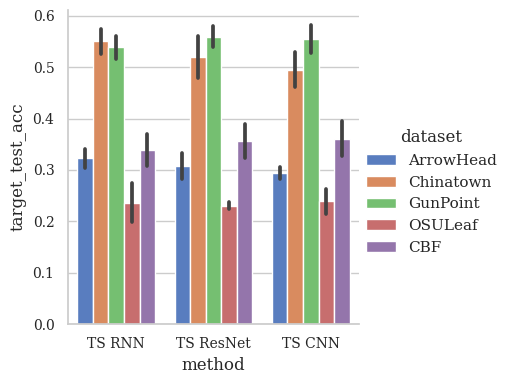

In [8]:
data = df.copy()
data["method"] = data["repr"] + " " + data["arch"]
sns.catplot(data=data, x='method', y="target_test_acc", hue="dataset", kind="bar",  
            height=4, aspect=1, legend=True, legend_out=True, palette="muted",
            errorbar="sd");
plt.savefig("bline_CNN.pdf")